<a href="https://colab.research.google.com/github/au312821243036/CODSOFT/blob/main/CreditCradFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

In [3]:
data = pd.read_csv(r'creditcard.csv')


In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())


(11892, 31)
               Time            V1            V2            V3            V4  \
count  11892.000000  11892.000000  11892.000000  11892.000000  11892.000000   
mean   46909.341406     -0.260520     -0.002347      0.667150      0.163529   
std    19047.454950      1.903921      1.694416      1.320715      1.346837   
min        0.000000    -30.821436    -40.978852    -28.923756     -4.769901   
25%    35349.750000     -1.009164     -0.581641      0.159962     -0.706005   
50%    48890.000000     -0.241229      0.089665      0.753667      0.207615   
75%    62483.750000      1.156440      0.744928      1.373418      1.028055   
max    75258.000000      1.626240     15.598193      4.079168     11.927512   

                 V5            V6            V7            V8            V9  \
count  11892.000000  11892.000000  11892.000000  11892.000000  11892.000000   
mean      -0.284383      0.089006     -0.129749      0.044990     -0.074708   
std        1.385148      1.313276      

PLOTTING HISTOGRAMS

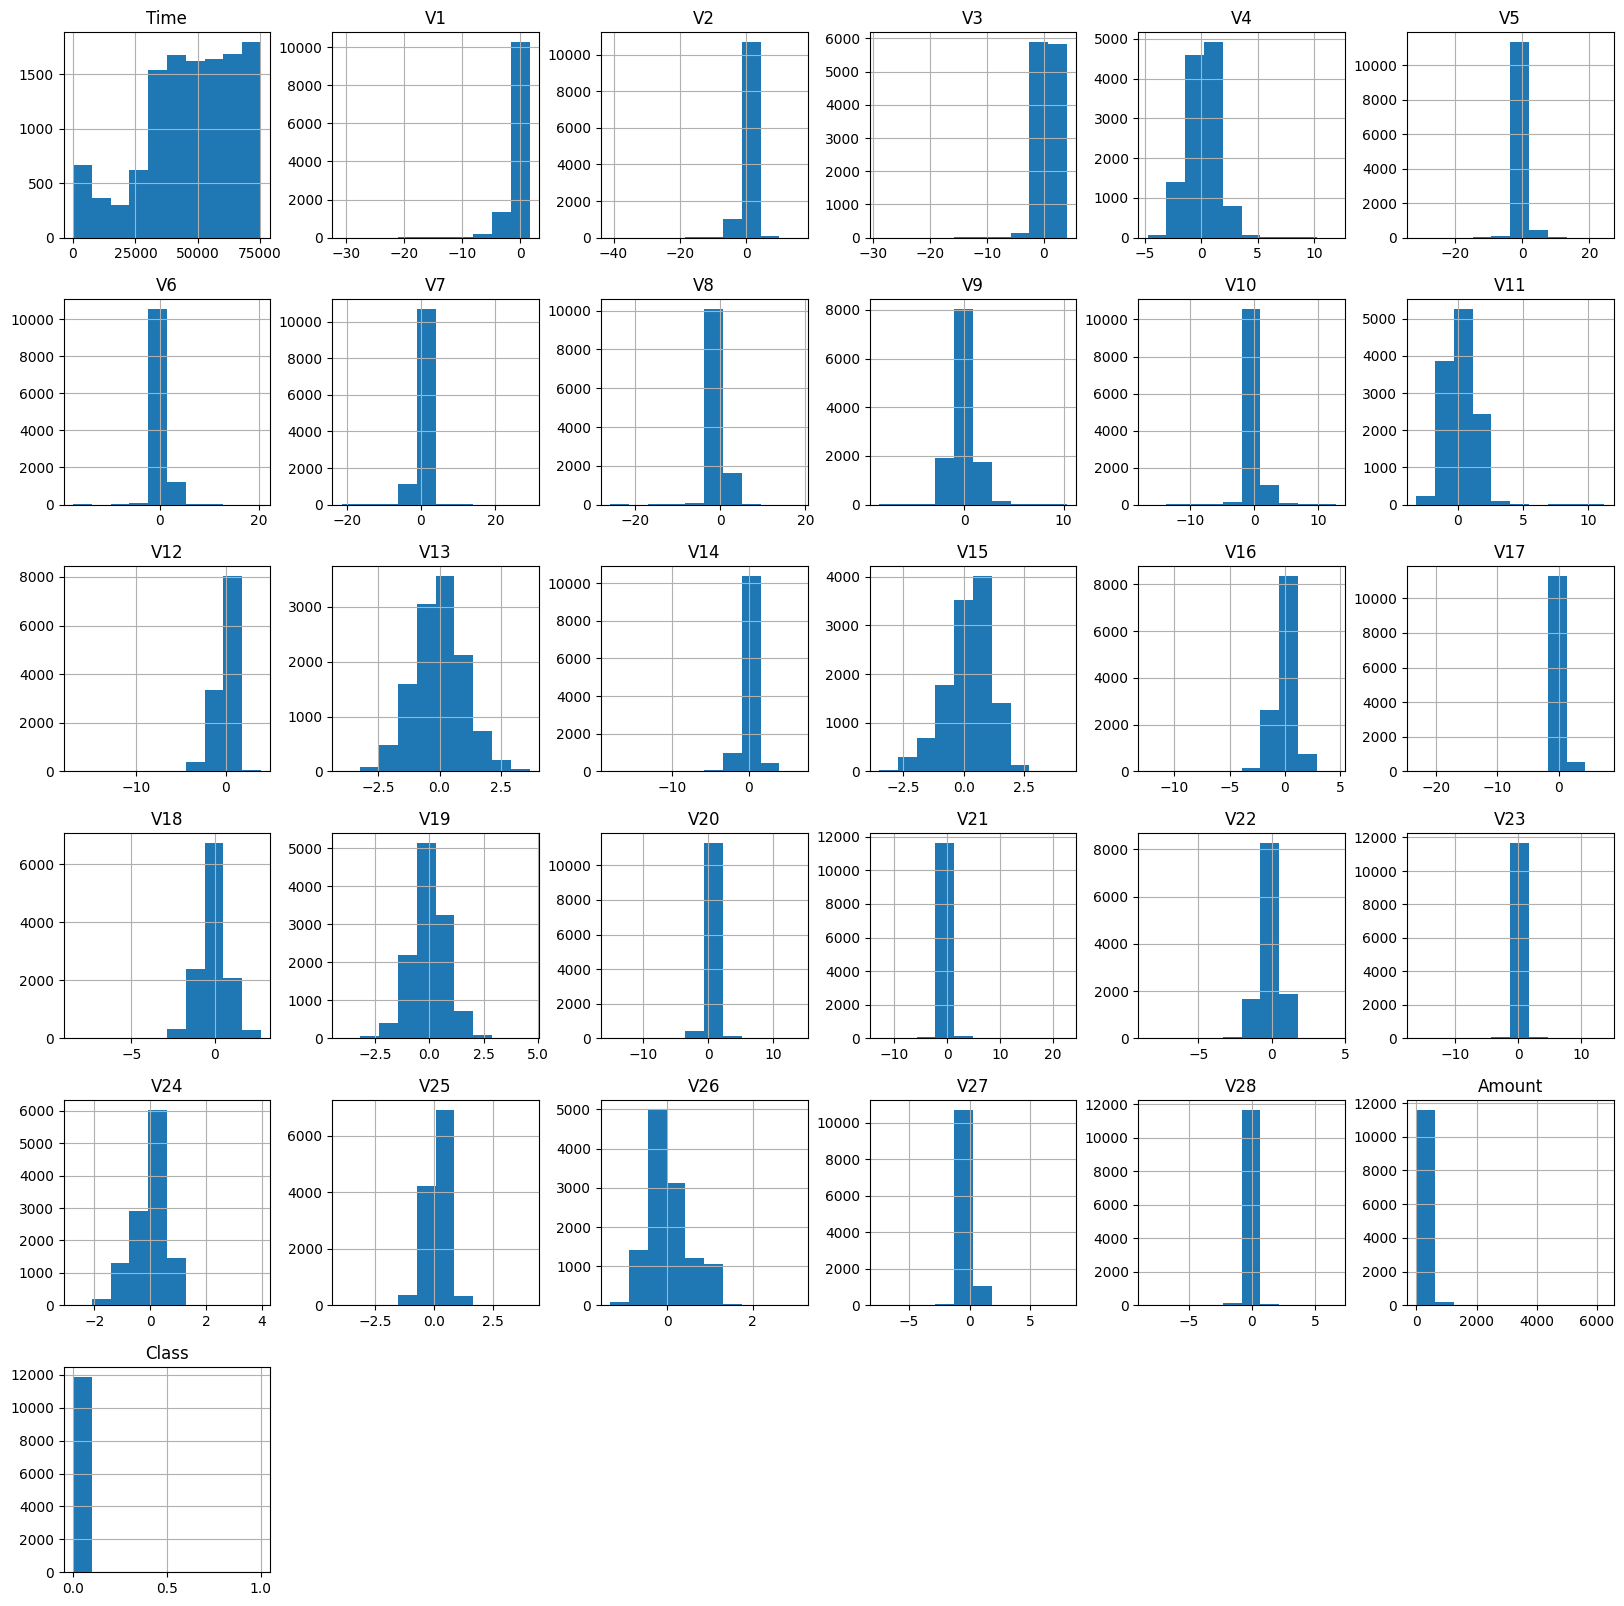

In [6]:
data.hist(figsize = (20, 20))
plt.show()

In [8]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.00101010101010101
Fraud Cases: 12
Valid Transactions: 11880


CORRELEATION MATRIX

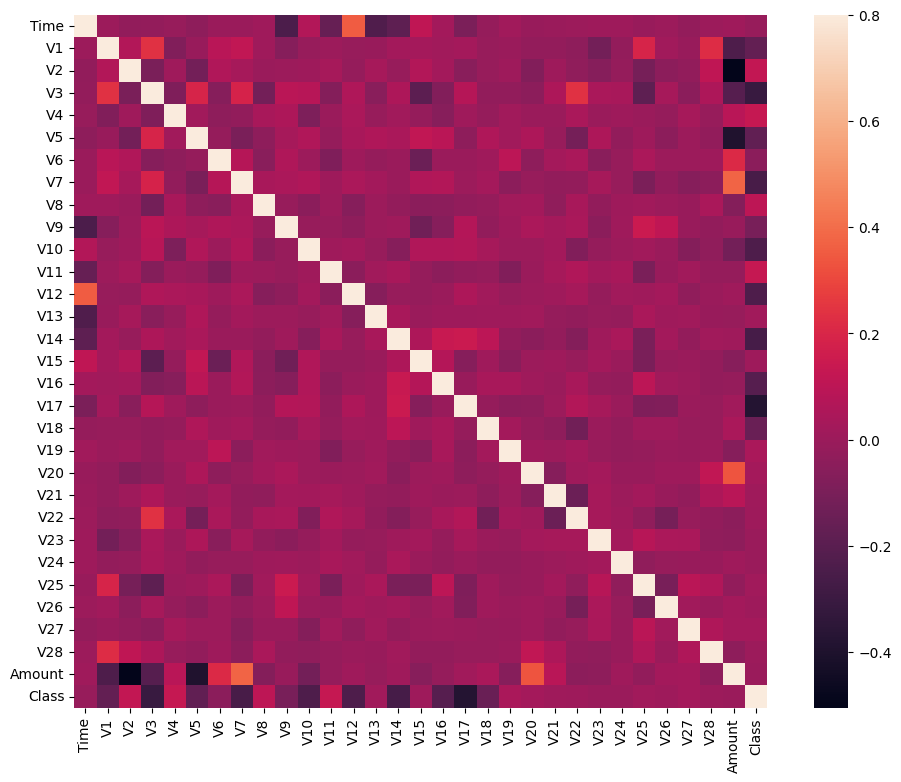

In [9]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
columns = data.columns.tolist()

In [11]:

columns = [c for c in columns if c not in ["Class"]]

In [12]:
target = "Class"

X = data[columns]
Y = data[target]

In [13]:
print(X.shape)
print(Y.shape)


(11892, 30)
(11892,)


In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [15]:
state = 1

In [16]:
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>

In [17]:
for i, (clf_name, clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
 y_pred[y_pred == 1] = 0
 y_pred[y_pred == -1] = 1

In [20]:
 n_errors = (y_pred != Y).sum()

RUNNING CLSSIFIER METRICS

In [21]:
print('{}: {}'.format(clf_name, n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Local Outlier Factor: 25
0.9978977463841238
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11880
         1.0       0.00      0.00      0.00        12

    accuracy                           1.00     11892
   macro avg       0.50      0.50      0.50     11892
weighted avg       1.00      1.00      1.00     11892

